# **Task 1 - Python** 

Write a function that takes a list of numbers as an input and counts the number of occurrences of each number in the list. <br>  The output should be a dictionary whose keys are the numbers. For each key, the corresponding value should be its number of occurrences.
<br> For example, if the input is [1, 5, 1, 2, 2, 3, 4, 4], the output should be {'1': 2, '2': 2, '3': 1, '4': 2, '5':1}

# **Solution**

In [ ]:
#Function
def number_count(input_list):
  output_dic = {}
  temp=''
  for i in range(len(input_list)):
    temp = input_list[i]
    if temp not in output_dic:
      output_dic.update({temp:1})
    else:
      output_dic[temp] = output_dic[temp] + 1
  output_temp = sorted(output_dic.items())
  output_dic = dict((str(x), y) for x, y in output_temp)
  return output_dic

In [ ]:
#Tests:
#Test1:
input1 = [1, 5, 1, 2, 2, 3, 4, 4]
output1 = number_count(input1)
print(output1)

#Test2:
input2 = [10, 5, 1, 23, 2, 3, 23, 4]
output2 = number_count(input2)
print(output2)

{'1': 2, '2': 2, '3': 1, '4': 2, '5': 1}
{'1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '10': 1, '23': 2}


# Task 2 - Data Manipulation

Provide info about [this](https://www.kaggle.com/shivamb/netflix-shows) dataset:
1. How many rows, columns?
2. How many null values?
3. Are there any duplicates?
4. Visualize the show types using a suitable plot.

# **Solution**

1:
->Number of columns: 12
->Number of rows: 8807

2. Number of null values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3. Number of duplicates: 0

4. Visualizing the show types using a suitable plot:



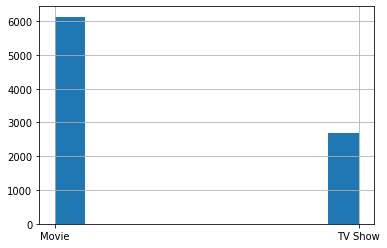

In [ ]:
import numpy as np
import pandas as pd

#read dataset
raw_data = pd.read_csv('netflix_titles.csv') #netflix_titles.csv is an uploaded file into the virtual disk
data= raw_data.copy(deep=True) #it is always a good practise to keep a copy of the original data

#read columns and rows numbers
(x,y) = data.shape
print("1:")
print("->Number of columns:",y)
print("->Number of rows:",x)

#check if there are null values
print("\n2. Number of null values:")
print(data.isna().sum())

#check for duplicates
d = data.duplicated().sum()
print("\n3. Number of duplicates:", d)

#Visualizing the show types using a suitable plot:
print("\n4. Visualizing the show types using a suitable plot:\n")
#Plots using Pandas
data['type'].hist();

# **Task 3 - Bonus** 
### This task was prepared by Eng. Muhammad Al Aref

Now let's use what we learned so far to *estimate $\pi$*!

Consider a dart board shaped like a circle enclosed by a square and you are throwing darts at it. You are very good and you never land a dart off the square but you are not aiming for anything in particular inside it, so a dart has an equal chance of falling anywhere inside the square!

Then, the chance of a dart to fall inside the circle is the ratio of the circle area to the square area. $$p(circle) = \dfrac{circle\ area}{square\ area} = \dfrac{\pi r^2}{(2r)^2} = \dfrac{\pi}{4}$$ This means that $$\pi = 4 * p(circle)$$

Now, the remaining question is, how do we estimate the probability? We can do that by simulating random thrown darts, counting the ones that land inside the circle and divide that by the total number of thrown darts!

$$p(circle) = \dfrac{number\ of\ darts\ inside\ the\ circle}{total\ number\ of\ darts}$$

That way of estimating probabilites is called *Monte Carlo* simulation. <br>
Hint: Use Python's `Random` Library

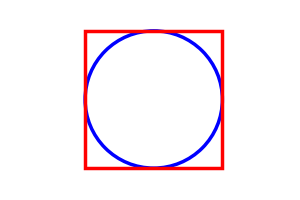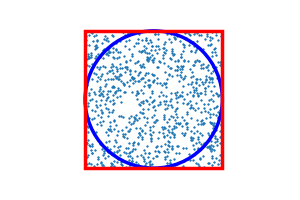

# **Solution**

pi = 3.1268


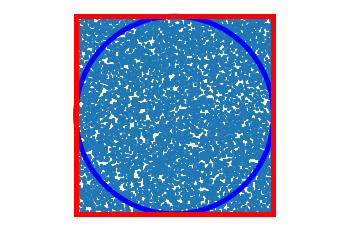

In [ ]:
import random

#Simulating random dart throwing at (generate random points in) a square:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle

ax = plt.axes()
ax.add_patch(Circle((0,0), 1, fill=False, edgecolor='blue', aa=True, lw=5))
ax.add_patch(Rectangle((-1, -1), 2, 2, fill=False, edgecolor='red', aa=True, lw=5))

x = [random.uniform(-1, 1) for _ in range(10000)]
y = [random.uniform(-1, 1) for _ in range(10000)]
ax.scatter(x, y, s=5)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axis('equal')
ax.grid(False)
ax.set_axis_off()

#Counting the darts (points) fallen into its inner circle:
circle_num = 0
for i in range(10000):
  if (x[i]**2 + y[i]**2) <= 1:
    circle_num = circle_num + 1 
#Estimating p(circle):
p_circle = circle_num/10000
#Using p(circle) to estimate  π:
pi = 4 * p_circle 
print("pi =", pi)